In [1]:
import os

import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt

from src.models.models import unet_model
from src.features.extract_features import reshape_image_unet
from src.models.utils import predict_volume
from src.data.tf_data_hdf5 import preprocess_image, get_bb_mask_voxel
from src.data.utils import get_split

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
model = unet_model(3, input_shape=(None, None, 3), upsampling_kind="trans_conv")

In [33]:
model_trained = tf.keras.models.load_model(
    "/home/valentin/python_wkspce/plc_segmentation/models/pretrained_unet__alpha_0.9__upsampling_trans_conv__split_0__oversample_True__rangle_None__rshift_None__20211213-194032/model_weight",
    compile=False)


In [34]:
model.set_weights(model_trained.get_weights())

In [35]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, None, None,  1841984     input_2[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, None, 5 3017728     model[0][4]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, None, None, 1 0           sequential[0][0]                 
                                                                 model[0][3]                

In [36]:
h5_file = h5py.File("../data/processed/hdf5_2d/data.hdf5", "r")
patient_list = list(h5_file)
patient_list.remove("PatientLC_63")  # Just one lung
patient_list.remove("PatientLC_72")  # the same as 70



In [37]:
splits = get_split(0)
ids_train = splits["train"]
ids_val = splits["val"]
ids_test = splits["test"]

In [38]:
ids_train

['PatientLC_40',
 'PatientLC_52',
 'Case_18',
 'Case_5',
 'Case_10',
 'Case_14',
 'PatientLC_90',
 'PatientLC_18',
 'PatientLC_94',
 'Case_12',
 'Case_1',
 'PatientLC_93',
 'Case_3',
 'PatientLC_20',
 'PatientLC_82',
 'PatientLC_36',
 'PatientLC_15',
 'PatientLC_24',
 'PatientLC_88',
 'PatientLC_67',
 'PatientLC_39',
 'PatientLC_61',
 'PatientLC_16',
 'PatientLC_53',
 'PatientLC_22',
 'PatientLC_29',
 'PatientLC_60',
 'PatientLC_62',
 'PatientLC_64',
 'PatientLC_13',
 'PatientLC_55',
 'PatientLC_73',
 'PatientLC_70',
 'PatientLC_2',
 'PatientLC_66',
 'PatientLC_56',
 'PatientLC_65',
 'PatientLC_46',
 'PatientLC_9',
 'PatientLC_50',
 'PatientLC_26',
 'PatientLC_37',
 'PatientLC_21',
 'PatientLC_42',
 'PatientLC_45',
 'PatientLC_81',
 'PatientLC_19',
 'PatientLC_74',
 'PatientLC_32',
 'PatientLC_34',
 'PatientLC_87']

In [39]:
patient = "PatientLC_36"
image = h5_file[patient]["image"][()]
mask = h5_file[patient]["mask"][()]

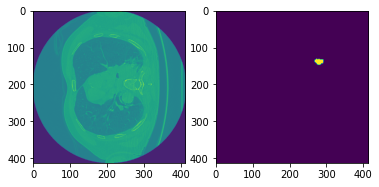

In [40]:
plt.subplot(121)
plt.imshow(image[:,:,15,0])
plt.subplot(122)
plt.imshow(mask[:,:,15,1])

In [41]:
pet_mean = np.mean(image[...,1])
pet_std = np.std(image[...,1])
image = reshape_image_unet(image, mask[..., 2] + mask[..., 3])
image = preprocess_image(image, pet_mean=pet_mean, pet_std=pet_std)
prediction = predict_volume(image, model)
 

In [42]:
prediction.shape

(288, 288, 49, 3)

In [43]:
np.sum(prediction[..., 1] > 0.5)

0

In [44]:
get_bb_mask_voxel(mask[:, :, :, 1])

array([128, 265,  10, 152, 294,  38])

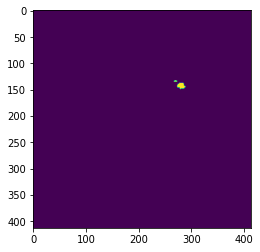

In [45]:
plt.imshow(mask[:, :, 30, 1])


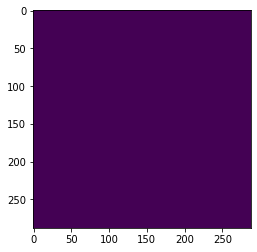

In [46]:
plt.imshow(prediction[:, :, 40, 1]> 0.5)


In [ ]:
plt.imshow(image[:, :, 15, 0])
plt.colorbar()


In [ ]:
np.std(image[:, :, :, 1])